In [2]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

np.set_printoptions(precision=5,linewidth=120,suppress=True)

# the bisect module enables to easily keep an ordered list
# cf. https://docs.python.org/3.7/library/bisect.html
# useful for maintaining the OPEN list
import bisect

In [28]:
def breadthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
        ## Step 1: initialization
    d = [float("inf") for n in graph]
    d[start_node] = 0   
    PARENT = [None for n in graph]
    UPPER = float("inf")
    OPEN = [start_node]
    ## Calculate how many nodes visited 
    visited = 0
    while len(OPEN) > 0:
        ## Step 2: Remove a node i from OPEN and set CURRENT = i
        CURRENT = OPEN[0]
        OPEN = OPEN[1:]
        visited += 1
        ## Step 3: For each child j of CURRENT, if di + aij < min{dj , UPPER}:
        for child in graph[CURRENT]:
            if d[CURRENT] + cost[child, CURRENT] < min(d[child], UPPER):
            ## 3a: Set dj = di + aij 
                d[child] = d[CURRENT] + cost[child, CURRENT]
            ## 3b: Set PARENT[i] = j
                PARENT[child] = CURRENT
            ## 3c:
                ## If j = T, set UPPER to the new value dT
                if child == end_node:
                    UPPER = d[child]
                ## If j != T, place j in OPEN if it is not already in OPEN
                elif child not in OPEN:
                ## Breadth first research, add j to the end of the list, search following the order of computation.
                    OPEN = OPEN + [child]
    print(f"{visited} nodes are visited")
    ## Step 4: if dT = ∞ there is not path from S to T
    path = []
    if d[end_node] == float("inf"):
        return path
    ## dT is the length of the shortest path and the optimal path can be read backwards following the parents
    ## Repeat the loop until open is []
    node = end_node
    path.append(node)
    while PARENT[node] is not None:
        node = PARENT[node]
        path = [node] + path
    return path

def depthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
 ## Initialization
    d = [float("inf") for n in graph]
    d[start_node] = 0   
    PARENT = [None for n in graph]
    UPPER = float("inf")
    OPEN = [start_node]
    ## Calculate how many nodes visited 
    visited = 0
    while len(OPEN) > 0:
        ## Step 2: Remove a node i from OPEN and set CURRENT = i
        CURRENT = OPEN[0]
        OPEN = OPEN[1:]
        visited += 1 
        ## Step 3: For each child j of CURRENT, if di + aij < min{dj , UPPER}:
        for child in graph[CURRENT]:
            if d[CURRENT] + cost[child, CURRENT] < min(d[child], UPPER):
            ## 3a: Set dj = di + aij 
                d[child] = d[CURRENT] + cost[child, CURRENT]
            ## 3b: Set PARENT[i] = j
                PARENT[child] = CURRENT
            ## 3c:
                ## If j = T, set UPPER to the new value dT
                if child == end_node:
                    UPPER = d[child]
                ## If j != T, place j in OPEN if it is not already in OPEN
                elif child not in OPEN:
                ## depth first research, add j to the start of the list, search from the last computation.    
                    OPEN = [child] + OPEN
    print(f"{visited} nodes are visited")
    ## Step 4: if dT = ∞ there is not path from S to T
    path = []
    if d[end_node] == float("inf"):
        return path
    ## dT is the length of the shortest path and the optimal path can be read backwards following the parents
    ## Repeat the loop until open is []
    node = end_node
    path.append(node)
    while PARENT[node] is not None:
        node = PARENT[node]
        path = [node] + path
    return path

def AStar(graph, start_node, end_node, cost, heuristic):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    ## step 1: initialization
    d = [float("inf") for n in graph]
    d[start_node] = 0
    PARENT = [None for n in graph]
    OPEN = [start_node]
    ## initial heuristic hi;j
    VALUE = [0]
    CLOSED = [False for n in graph]
    ## Calculate how many nodes visited 
    visited = 0
    while len(OPEN) > 0:
        ## Step 2: Remove the first node i from OPEN, set CURRENT = i and add i to CLOSED
        CURRENT = OPEN[0]
        OPEN = OPEN[1:]
        VALUE = VALUE[1:]
        CLOSED[CURRENT] = True
        visited += 1
        ## Step 3: If CURRENT=T success - the algorithm returns
        if CURRENT == end_node:
            break
        ## Step 4: For each child j of CURRENT not in CLOSED, if di + aij < dj then
        for child in graph[CURRENT]:
            if (d[CURRENT] + cost[child, CURRENT] < d[child]) and not CLOSED[child]:
                ##4a: dj = di + aij
                d[child] = d[CURRENT] + cost[child, CURRENT]
                ##4b: Set P ARENT[j] = i
                PARENT[child] = CURRENT
                ##4c: Add j in the sorted list OPEN according to vj = dj + hj
                h = 0
                value = d[child] + h 
                idx = bisect.bisect_left(VALUE, value)
                OPEN = OPEN[:idx] + [child] + OPEN[idx:]
                VALUE =  VALUE[:idx] + [value] + VALUE[idx:]
    print(f"{visited} nodes are visited")
    ## Step 5: if dT = ∞ there is not path from S to T
    path = []
    if d[end_node] == float("inf"):
        return path
    ## dT is the length of the shortest path and the optimal path can be read backwards following the parents
    ## Repeat the loop until open is []
    node = end_node
    path.append(node)
    while PARENT[node] is not None:
        node = PARENT[node]
        path = [node] + path
    return path

def AStar2(graph, start_node, end_node, cost, N):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    ## step 1: initialization
    d = [float("inf") for n in graph]
    d[start_node] = 0
    PARENT = [None for n in graph]
    OPEN = [start_node]
    ## initial heuristic hi;j
    x_end , y_end = convert_to_matrixindex(end_node, N)
    x_start , y_start = convert_to_matrixindex(start_node, N)
    VALUE = [(abs(x_end-x_start) + abs(x_end-x_start))]
    CLOSED = [False for n in graph]   
    ## Calculate how many nodes visited
    visited = 0
    while len(OPEN) > 0:
        ## Step 2: Remove the first node i from OPEN, set CURRENT = i and add i to CLOSED
        CURRENT = OPEN[0]
        OPEN = OPEN[1:]
        VALUE = VALUE[1:]
        CLOSED[CURRENT] = True
        visited += 1
        ## Step 3: If CURRENT=T success - the algorithm returns       
        if CURRENT == end_node:
            break
        ## Step 4: For each child j of CURRENT not in CLOSED, if di + aij < dj then
        for child in graph[CURRENT]:
            if (d[CURRENT] + cost[child, CURRENT] < d[child]) and not CLOSED[child]:
                ##4a: dj = di + aij
                d[child] = d[CURRENT] + cost[child, CURRENT]
                ##4b: Set P ARENT[j] = i
                PARENT[child] = CURRENT
                ##4c: Add j in the sorted list OPEN according to vj = dj + hj
                x_child , y_child =  convert_to_matrixindex(child, N)
                h = abs(x_end-x_child) + abs(x_end-x_child)
                value = d[child] + h 
                idx = bisect.bisect_left(VALUE, value)
                OPEN = OPEN[:idx] + [child] + OPEN[idx:]
                VALUE =  VALUE[:idx] + [value] + VALUE[idx:]
    print(f"{visited} nodes are visited")
    ## Step 5: if dT = ∞ there is not path from S to T
    path = []
    if d[end_node] == float("inf"):
        return path    
    ## dT is the length of the shortest path and the optimal path can be read backwards following the parents
    ## Repeat the loop until open is []
    node = end_node
    path.append(node)
    while PARENT[node] is not None:
        node = PARENT[node]
        path = [node] + path
    return path

In [4]:
def display_result(world_mat, path):
    """
    This function displays a maze described in world_mat and a path inside the maze
    world_mat: a NxN matrix that contains the maze (0 for free path, -10 for obstacle)
    path: a list of elements numbered as the graph (i.e. from 0 to N**2-1)
    """
    N = world_mat.shape[0]
    display_mat = world_mat.copy()
    for el in path:
        display_mat[convert_to_matrixindex(el,N)] = 5
    plt.matshow(display_mat, cmap='Greys')
    
def convert_to_listindex(i,j,N):
    """
    This function converts a (i,j) matrix entry index to a list index for matrix of size N
    """
    return N*i+j

def convert_to_matrixindex(a,N):
    """
    This function converts a list entry a into a (i,j) matrix entry for matrix of size N
    """
    i = int(a/N) # the result of integer division
    j = int(a%N) # the  remainder of the division
    return i,j

def create_graph(world_mat):
    """
    This functions takes a NxN matrix in entry and creates a graph and a map of costs
    Since we use lists, for a world_mat of size NxN, we associate to the entry [i,j] of world_map
    the index a=N*i + j of the list
    output:
        graph: a list of neighbors  (indexed as explained above)
        cost: a N**2 x  N**2 array. Each entry cost[i,j] contains the cost of transitioning from node i to node j
            it is infinite if there is no edge from i to j
    """
    N = world_mat.shape[0]
    graph = []
    for i in range(N):
        for j in range(N):
            neigh = []
            if(i!=N-1):
                if(world_mat[i+1,j]==0):
                    neigh.append(N*(i+1)+j)
            if(i!=0):
                if(world_mat[i-1,j]==0):
                    neigh.append(N*(i-1)+j)
            if(j!=N-1):
                if(world_mat[i,j+1]==0):
                    neigh.append(N*i+j+1)
            if(j!=0):
                if(world_mat[i,j-1]==0):
                    neigh.append(N*i+j-1)
            graph.append(neigh)
    
    cost = np.ones([N*N,N*N]) * np.inf
    
    for i in range(N*N):
        for j in graph[i]:
            cost[i,j] = 1
    
    return graph, cost

[[ 0.  0.  0.  0. 10.]
 [ 0. 10. 10.  0.  0.]
 [ 0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0. 10. 10.  0.  0.]]


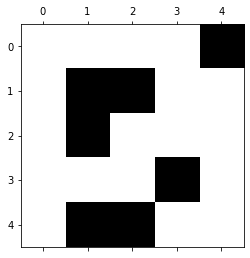

In [5]:
# let's create a map corresponding to the robot path planning example of lecture 3
# it is a 5x5 grid
world_map = np.zeros([5,5])
# and it contains obstacles which we mark as non 0
world_map[0,4] = 10
world_map[1,1:3] = 10
world_map[2,1] = 10
world_map[3,3] = 10
world_map[4,1:3] = 10

# we can print the matrix
print(world_map)

# we can now display the result
display_result(world_map, [])

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


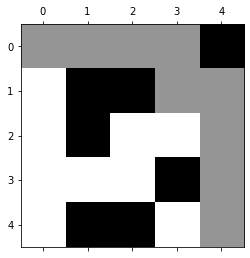

In [6]:
# let's assume we have a path from (0,0) to (4,4) that does (in linear index)
path = [0,1,2,3,8,9,14,19,24]

# we print the equivalent in matrix entries
for a in path:
    print(convert_to_matrixindex(a, 5))

# and we display it on the world grid (shown in grey)
display_result(world_map, path)


In [7]:
# we can also create the associated graph and costs
graph, cost = create_graph(world_map)

# the neighbors of entry the cell [0,0] are
print('Neighbors of entry [0,0]')
a = convert_to_listindex(0,0,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))
    
print('\n\nNeighbors of entry [2,3]')
a = convert_to_listindex(2,3,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))

Neighbors of entry [0,0]
in linear indexes: 5 which corresponds to the matrix entry: (1, 0)
in linear indexes: 1 which corresponds to the matrix entry: (0, 1)


Neighbors of entry [2,3]
in linear indexes: 8 which corresponds to the matrix entry: (1, 3)
in linear indexes: 14 which corresponds to the matrix entry: (2, 4)
in linear indexes: 12 which corresponds to the matrix entry: (2, 2)


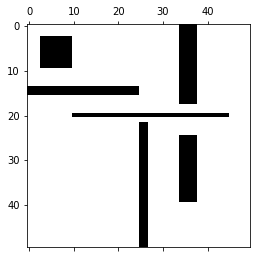

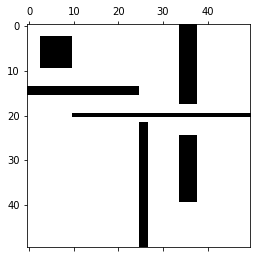

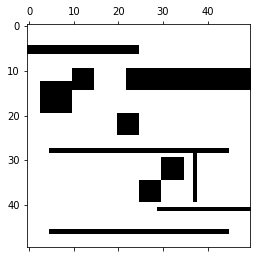

In [9]:
# here we load the 3 mazes and display them
maze1 = np.load('maze1.npy')
display_result(maze1, [])

maze2 = np.load('maze2.npy')
display_result(maze2, [])

maze3 = np.load('maze3.npy')
display_result(maze3, [])


# Depth First Searching for Question （a）

Maze 0

17 nodes are visited
[24, 19, 14, 13, 8, 3, 2, 1, 0]
9


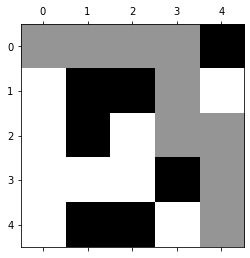

In [22]:
N=5
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(world_map)
path = depthFirstSearch(graph, end_node, start_node, cost)
print(path)
print(len(path))
display_result(world_map, path)

Maze 1

223241 nodes are visited
99


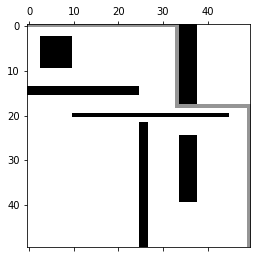

In [23]:
maze = maze1
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = depthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 2

176721 nodes are visited
131


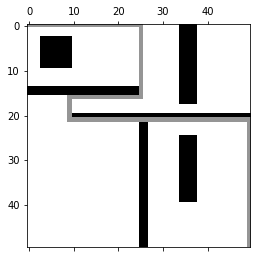

In [24]:
maze = maze2
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = depthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 3

332734 nodes are visited
141


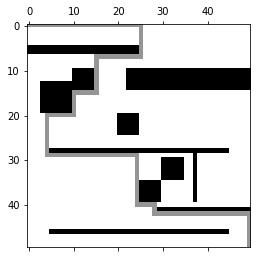

In [25]:
maze = maze3
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = depthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

# Bread First Searching for Question （b）

Maze0

16 nodes are visited
9


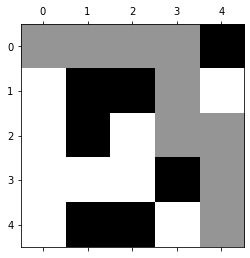

In [17]:
N=5
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(world_map)
path = breadthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(world_map, path)

Maze 1

2024 nodes are visited
99


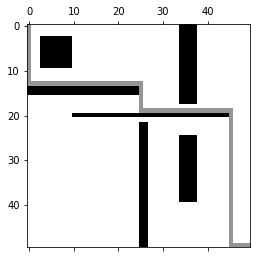

In [18]:
maze = maze1
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = breadthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 2

2172 nodes are visited
131


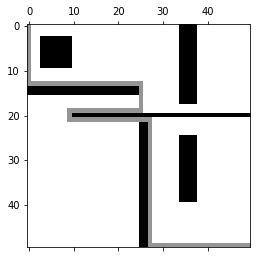

In [20]:
maze = maze2
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = breadthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 3

2048 nodes are visited
141


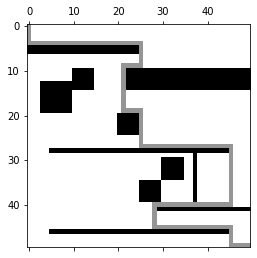

In [21]:
maze = maze3
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = breadthFirstSearch(graph, start_node, end_node, cost)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

#  A* algorithm for Question （c）

AS heuristic hi,j = 0 (where i and j are the i row and j column entry)

Maze 0

17 nodes are visited
9
[24, 19, 14, 13, 8, 3, 2, 1, 0]


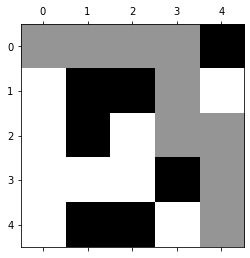

In [29]:
N=5
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(world_map)
path = AStar(graph, end_node, start_node, cost, N)
print(len(path))
print(path)
# display it on the world grid (shown in grey)
display_result(world_map, path)

Maze 1

2037 nodes are visited
99


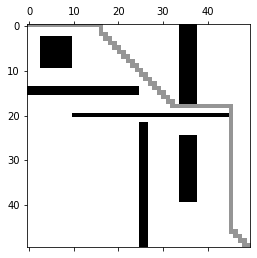

In [30]:
maze = maze1
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = AStar(graph, start_node, end_node, cost, N)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 2

2173 nodes are visited
131


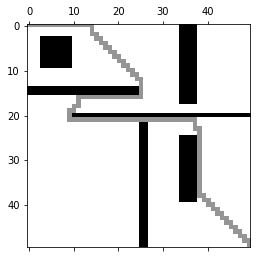

In [33]:
maze = maze2
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = AStar(graph, start_node, end_node, cost, N)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 3

2049 nodes are visited
141


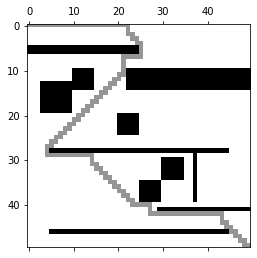

In [32]:
maze = maze3
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = AStar(graph, start_node, end_node, cost, N)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

AS heuristic hi,j = |i−goali|+|j−goalj|where goali and goalj are the coordinates of the goal position 

Maze 0

11 nodes are visited
9
[24, 19, 14, 9, 8, 3, 2, 1, 0]


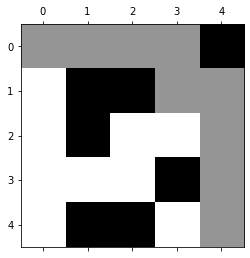

In [35]:
N=5
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(world_map)
path = AStar2(graph, end_node, start_node, cost, N)
print(len(path))
print(path)
# display it on the world grid (shown in grey)
display_result(world_map, path)

Maze 1

1724 nodes are visited
99


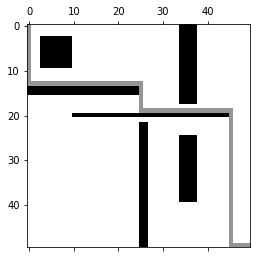

In [36]:
maze = maze1
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = AStar2(graph, start_node, end_node, cost, N)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 2

2286 nodes are visited
131


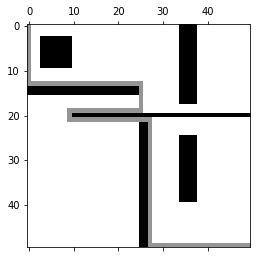

In [37]:
maze = maze2
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = AStar2(graph, start_node, end_node, cost, N)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)

Maze 3

2732 nodes are visited
141


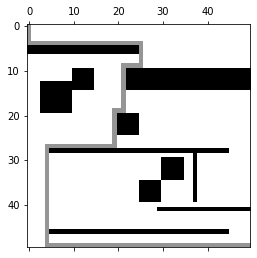

In [38]:
maze = maze3
N = maze.shape[0]
start_node = convert_to_listindex(0,0,N)
end_node = convert_to_listindex(N-1,N-1,N)
graph, cost = create_graph(maze)
path = AStar2(graph, start_node, end_node, cost, N)
print(len(path))
# display it on the world grid (shown in grey)
display_result(maze, path)